In [1]:
import pandas as pd

df = pd.read_csv('./data_set/diabetes.csv', encoding='utf-8-sig')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test, pred)
  
	#ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  
  #ROC-AUC print
  print(f'정확도 : {accuracy:.4f} || 정밀도 : {precision:.4f} || 재현율 : {recall:.4f} || F1점수 : {f1:.4f} || AUC : {roc_auc:.4f}')


In [52]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  
	#X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot수행, 정밀도는 점섬으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle ='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  
	#threshold값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  
	#x축, y축 label과 legend, grid 설정
  plt.xlabel('Threshild value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
X = df.iloc[:,:-1] #제일 마지막 열 빼고 다 선택
y = df.iloc[:,-1] # 제일 마지막 열만 선택

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y )
#stratify 데이터 세트 불할시 현재 y값이 구성된 비율 그대로를 유지
#데이터의 불균형이 생기지 않도록

#로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
#predict_proba => 클래스별 확률을 배열로 반환
#-1의 의미는 모등 행의 마지막열의 결과만 가지고 와라, 결론적으로는 클래스1의 결과값만 반환해라
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[88 12]
 [26 28]]
정확도 : 0.7532 || 정밀도 : 0.7000 || 재현율 : 0.5185 || F1점수 : 0.5957 || AUC : 0.7926


c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


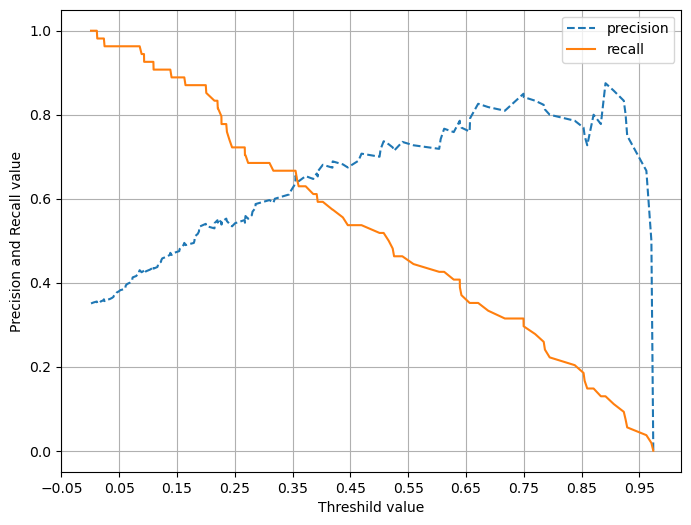

In [53]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,-1]
precision_recall_curve_plot(y_test, pred_proba_c1)